In [1]:
%matplotlib inline

import numpy as np
from matplotlib import pyplot as plt
import imageio
import scipy.ndimage as ndi


bright_square = np.zeros((10,10), dtype = float)
bright_square[2:8, 2:8] = 1
bright_square[4:6, 4:6] = 0
print(bright_square)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 1. 1. 1. 1. 0. 0.]
 [0. 0. 1. 1. 1. 1. 1. 1. 0. 0.]
 [0. 0. 1. 1. 0. 0. 1. 1. 0. 0.]
 [0. 0. 1. 1. 0. 0. 1. 1. 0. 0.]
 [0. 0. 1. 1. 1. 1. 1. 1. 0. 0.]
 [0. 0. 1. 1. 1. 1. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


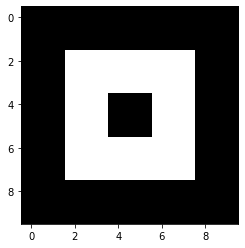

In [2]:
fig, ax = plt.subplots()
ax.imshow(bright_square, cmap='gray');

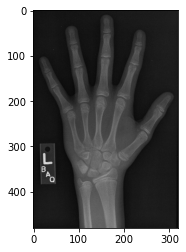

In [3]:
# Load the hand radiograph
imm = imageio.imread('D:\Teaching\Pengolahan Citra Medika\Database\hand.png')
plt.imshow(imm, cmap='gray')

array([[-1],
       [ 0],
       [ 1]])

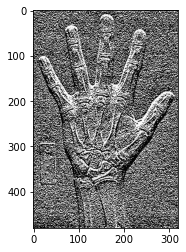

In [4]:
vertical_kernel = np.array([[-1],[0],[1]])

gradient_vertical = ndi.convolve(imm,vertical_kernel)
fig, ax = plt.subplots()
ax.imshow(gradient_vertical, cmap='gray');
vertical_kernel

array([[-1,  0,  1]])

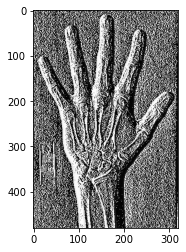

In [5]:
horizontal_kernel = vertical_kernel.T 
gradient_horizontal = ndi.convolve(imm,horizontal_kernel)
fig, ax = plt.subplots()
ax.imshow(gradient_horizontal, cmap='gray');
horizontal_kernel
#print('dtype:', gradient_horizontal.dtype)

dtype: float16
Min. value: 0.0
Max value: 15.91
Min. value: 0.0
Max value: 1.0
dtype: float16
dtype: uint8


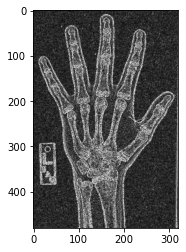

In [14]:
gradient_mag = np.sqrt(gradient_vertical**2 + gradient_horizontal**2)
print('dtype:', gradient_mag.dtype)
gradient_mag

print('Min. value:', gradient_mag.min())
print('Max value:', gradient_mag.max())

#-------Untuk membenarkan clipping---#
im_eq = gradient_mag/np.amax(gradient_mag)  #
im_eq = np.clip(im_eq, 0, 255)  #

print('Min. value:', im_eq.min())
print('Max value:', im_eq.max())
print('dtype:', im_eq.dtype)

from skimage import img_as_ubyte
gradient_mag2 = img_as_ubyte(im_eq)  #convert to uint8
print('dtype:', gradient_mag2.dtype)

fig, ax = plt.subplots()
ax.imshow(gradient_mag2, cmap='gray')
plt.show()

# Sobel Filter

source : https://scipy-lectures.org/advanced/image_processing/auto_examples/plot_find_edges.html

dtype: uint8
dtype mag sobel: float16
Min. value: 0.0
Max value: 15.81
Min. value: 0.0
Max value: 1.0
dtype: float16
dtype: uint8


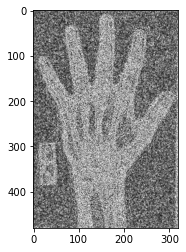

In [15]:
# Apply Sobel filter along both axes
sobel_ax0 = ndi.sobel(imm, axis=0) #horizontal axis=0
sobel_ax1 = ndi.sobel(imm, axis=1) #vertikal axis=1
#sobel_horizontal_kernel = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
#sobel_vertical_kernel = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
#sobel_ax0 = ndi.convolve(imm,sobel_horizontal_kernel)
#sobel_ax1 = ndi.convolve(imm,sobel_vertical_kernel)

print('dtype:', sobel_ax0.dtype)

# Calculate edge magnitude 
#edges = np.sqrt(np.square(sobel_ax0)+np.square(sobel_ax1))
edges = np.sqrt(sobel_ax0**2 + sobel_ax1**2)
print('dtype mag sobel:', edges.dtype)

print('Min. value:', edges.min())
print('Max value:', edges.max())

#-------Untuk membenarkan clipping---#
im_edges = edges/np.amax(edges)  #
im_edges = np.clip(im_edges, 0, 255)  #

print('Min. value:', im_edges.min())
print('Max value:', im_edges.max())
print('dtype:', im_edges.dtype)

from skimage import img_as_ubyte
edges2 = img_as_ubyte(im_edges)  #convert to uint8
print('dtype:', edges2.dtype)

# Plot edge magnitude
plt.imshow(edges2,cmap='gray')


In [8]:
sobel_horizontal_kernel = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
sobel_horizontal_kernel

array([[-1,  0,  1],
       [-2,  0,  2],
       [-1,  0,  1]])